In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/one-sky-data/oneskydata.csv


In [2]:
pip install pandas matplotlib plotly seaborn jupyter

Note: you may need to restart the kernel to use updated packages.


In [3]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tensorflow.keras

In [4]:
import os
current_folder = os.getcwd()

print(current_folder)

/kaggle/working


In [5]:
df = pd.read_csv("/kaggle/input/one-sky-data/oneskydata.csv")

In [6]:
df.info()
# id - reading;
# device_id - various devices
# pm25 - particles less than 2.5
# db?? - maybe decibels
# co2 - dioxide 
# voc - gases (volatile organic compounds)
# no2 - nitrogen
# co - carbon monoxide
# pm1 - 1 micrometer
# pm10 - 10 micrometers
# humidity - percent
# batter - device
# sv?? - maybe software version cause 0.01.18 --> 0.01.19
# ps?? - maybe power
# lat long missing from most readings
# message time - is quite different, 
## feels like devices were checked after some time manually

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58767 entries, 0 to 58766
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            58767 non-null  int64  
 1   device_id     58767 non-null  object 
 2   reading_time  58767 non-null  object 
 3   pm25          57835 non-null  float64
 4   db            57835 non-null  float64
 5   co2           57835 non-null  float64
 6   voc           57835 non-null  float64
 7   no2           57835 non-null  float64
 8   co            57835 non-null  float64
 9   no            57835 non-null  float64
 10  pm1           57835 non-null  float64
 11  pm10          57835 non-null  float64
 12  humidity      57835 non-null  float64
 13  temprature    57835 non-null  float64
 14  pressure      57835 non-null  float64
 15  battery       57835 non-null  float64
 16  signal        58767 non-null  int64  
 17  sv            58767 non-null  object 
 18  ps            58767 non-nu

# Task2 – Develop a list of data sets required within the new customer portal

Dataset 1: Air quality readings
- ID
- PM1
- PM2.5
- PM10
- CO
- CO2
- NO
- NO2
- VOC

Dataset 2: Environment readings
- ID
- Humidity
- Temperature
- Pressure 

Dataset 3: Device Data
- ID
- Device ID
- Mode(ps) - maybe power? 
- Software version (assuming sv is it) 

Dataset 4: Geolocation Data
- ID
- Longitute
- Latitude
- Decibels (sound pollution related to geo)

Dataset 5: Event Logging 
- ID 
- Reading Time
- Message Time


# TASK 3 - Develop a list of visuals required within the new customer portal

1. Time Series Analysis - air quality metrics over time in that location (if above WHO standard)
- ID
- PM1 - n/a 
- PM2.5 - 5 (24h mean)
- PM10 - 15 (24h mean)
- CO - 35 (1h mean)
- CO2 - n/a
- NO & No2- 200 (1h mean)
- VOC - N/a
- longitute
- latitude

Update 01.13/16h
The Pm1, Pm2.5 & Pm10 is in union, meaning pm1 is a subset of Pm2.5 and subset of pm10. Thus, I will drop pm1 and pm10, focusing on the middle subset, which has the highest chance to represent the category as a whole. 
I will drop Co2, as no guideline where it becomes bad by WHO has been found
I will add no and no2 together as they are usually referred together and will create a new column named nitrogen
I will drop VOC as even though it's harmful, I could not find the exact guideline based on regulations
I will also drop non location entries, empty entries, anything that does not help establishing a prediction over the location

Thus the updated parameters:
- ID
- reading_time
- pm25
- co
- nitrogen 
- longitute
- latitude


2. Heat Map where the pollution is biggest based on location
3. Overlaying heat maps with air quality metrics?? 
4. Data dashboard - summary of key metrics

In [7]:
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

In [8]:
df.drop(['device_id', 'db', 'co2', 'voc', 'pm1', 'pm10', 'humidity', 'temprature', 'pressure', 'battery', 'signal', 'sv', 'ps', 'message_time'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58767 entries, 0 to 58766
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            58767 non-null  int64  
 1   reading_time  58767 non-null  object 
 2   pm25          57835 non-null  float64
 3   no2           57835 non-null  float64
 4   co            57835 non-null  float64
 5   no            57835 non-null  float64
 6   latitude      58767 non-null  object 
 7   longitude     58767 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 3.6+ MB


In [10]:
df.dropna(inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57835 entries, 0 to 58766
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            57835 non-null  int64  
 1   reading_time  57835 non-null  object 
 2   pm25          57835 non-null  float64
 3   no2           57835 non-null  float64
 4   co            57835 non-null  float64
 5   no            57835 non-null  float64
 6   latitude      57835 non-null  object 
 7   longitude     57835 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 4.0+ MB


In [18]:
print(df.head(5))


         id             reading_time  pm25  no2   co   no latitude longitude
0  10501256  2023-10-09 07:26:02.000   9.0  0.0  0.0  0.0        ,         ,
1  10501259  2023-10-09 07:29:02.000  10.0  0.0  0.0  0.0        ,         ,
2  10501261  2023-10-09 07:31:02.000  10.0  0.0  0.0  0.0        ,         ,
3  10501264  2023-10-09 07:34:02.000   9.0  0.0  0.0  0.0        ,         ,
4  10501265  2023-10-09 07:35:02.000   9.0  0.0  0.0  0.0        ,         ,


In [32]:
df['latitude'] = df['latitude'].astype(str)
df['longitude'] = df['longitude'].astype(str)



In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57835 entries, 0 to 58766
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            57835 non-null  int64  
 1   reading_time  57835 non-null  object 
 2   pm25          57835 non-null  float64
 3   no2           57835 non-null  float64
 4   co            57835 non-null  float64
 5   no            57835 non-null  float64
 6   latitude      57835 non-null  object 
 7   longitude     57835 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 4.0+ MB


In [37]:
#deleting cells with comma (no location)
mask = df.apply(lambda x: x.str.contains(',') if x.dtype == "object" else False, axis=1).any(axis=1)
df = df[~mask]

print(df)

             id             reading_time   pm25  no2   co   no   latitude  \
100    10501451  2023-10-09 08:00:01.000  279.0  0.0  0.0  0.0  51186586N   
101    10501452  2023-10-09 08:01:01.000  283.0  0.0  0.0  0.0  51186586N   
102    10501453  2023-10-09 08:02:01.000  292.0  0.0  0.0  0.0  51186586N   
104    10501461  2023-10-09 08:05:01.000  293.0  0.0  0.0  0.0  51186586N   
105    10501462  2023-10-09 08:06:01.000  299.0  0.0  0.0  0.0  51186586N   
...         ...                      ...    ...  ...  ...  ...        ...   
58762   6860576  2023-01-24 08:16:01.000   22.0  0.0  0.0  0.0  51226318N   
58763   6860577  2023-01-24 08:17:01.000   23.0  0.0  0.0  0.0  51226318N   
58764   6860578  2023-01-24 08:18:01.000   22.0  0.0  0.0  0.0  51226318N   
58765   6860645  2023-01-24 08:25:01.000   23.0  0.0  0.0  0.0  51226318N   
58766   6860648  2023-01-24 08:28:01.000   19.0  0.0  0.0  0.0  51226318N   

       longitude  
100    00156474W  
101    00156474W  
102    00156474W  

In [58]:
#combine no and no2 columns
df['nitrogen'] = df['no']+df['no2']
df.drop(['no', 'no2'], axis=1, inplace=True)
print(df)

KeyError: 'no'

In [46]:
df.to_csv('one_sky_data_4.csv') # save new CSV

In [59]:
print(df)

             id             reading_time      pm25   co     latitude  \
100    10501451  2023-10-09 08:00:01.000  0.347880  0.0  3160.766667   
101    10501452  2023-10-09 08:01:01.000  0.352868  0.0  3160.766667   
102    10501453  2023-10-09 08:02:01.000  0.364090  0.0  3160.766667   
104    10501461  2023-10-09 08:05:01.000  0.365337  0.0  3160.766667   
105    10501462  2023-10-09 08:06:01.000  0.372818  0.0  3160.766667   
...         ...                      ...       ...  ...          ...   
58762   6860576  2023-01-24 08:16:01.000  0.027431  0.0  3822.966667   
58763   6860577  2023-01-24 08:17:01.000  0.028678  0.0  3822.966667   
58764   6860578  2023-01-24 08:18:01.000  0.027431  0.0  3822.966667   
58765   6860645  2023-01-24 08:25:01.000  0.028678  0.0  3822.966667   
58766   6860648  2023-01-24 08:28:01.000  0.023691  0.0  3822.966667   

       longitude  nitrogen  
100     -2607.90       0.0  
101     -2607.90       0.0  
102     -2607.90       0.0  
104     -2607.90   

# DATA PREPROCESSING
1. reading_data will be converted to hourly data
2. data normalisation for pm25, co and nitrogen
3. sorting by location, also converting location to - or + instead of E & W, N & S

# MODEL

# EVALUATION 
1. Rmse, absolute mean error

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
# rerun this thingie if geopy not used? - ask lecturer - design choice
# def convert_coords(coord, direction):
#     degrees = int(coord[:2])
#     minutes = float(coord[2:-1])
#     decimal_degrees = degrees + minutes / 60
#     if direction in ['S', 'W']:
#         decimal_degrees *= -1
#     return decimal_degree


In [64]:
df.info()
print(df)

<class 'pandas.core.frame.DataFrame'>
Index: 43330 entries, 100 to 58766
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            43330 non-null  int64  
 1   reading_time  43330 non-null  object 
 2   pm25          43330 non-null  float64
 3   co            43330 non-null  float64
 4   latitude      43330 non-null  float64
 5   longitude     43330 non-null  float64
 6   nitrogen      43330 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.6+ MB
             id             reading_time      pm25   co     latitude  \
100    10501451  2023-10-09 08:00:01.000  0.347880  0.0  3160.766667   
101    10501452  2023-10-09 08:01:01.000  0.352868  0.0  3160.766667   
102    10501453  2023-10-09 08:02:01.000  0.364090  0.0  3160.766667   
104    10501461  2023-10-09 08:05:01.000  0.365337  0.0  3160.766667   
105    10501462  2023-10-09 08:06:01.000  0.372818  0.0  3160.766667   
...         ..

In [63]:
# df['latitude'] = df['latitude'].apply(lambda x: convert_coords(x, x[-1]))
# df['longitude'] = df['longitude'].apply(lambda x: convert_coords(x, x[-1]))

In [62]:
# #normalisation
# scaler = MinMaxScaler()
# df[['pm25', 'co', 'nitrogen']] = scaler.fit_transform(df[['pm25', 'co', 'nitrogen']])

In [61]:
# #sequences
# def create_sequences(df, sequence_length):
# X, y = [], []
# for i in range(len(df) - sequence_length):
# X.append(df[['pm25', 'co', 'nitrogen']].iloc[i:i + sequence_length].values)
# y.append(df[['pm25', 'co', 'nitrogen']].iloc[i + sequence_length].values)
# return np.array(X), np.array(y)

# sequence_length = 2 # Number of previous time steps to consider
# X, y = create_sequences(df, sequence_length)

Project Plan

Key Project Stages:

1 – Understand current data to visualisation process 
2 – Develop a list of data sets required within the new customer portal
3 – Develop a list of visuals required within the new customer portal
4 – Develop a list of questions that we would like answered – possibly with the use of AI/Machine Learning
5 – Understand the IT infrastructure requirements we will have to support the steps above
6 – Define what we mean by an ‘alert’ and understand what the best form of communication is
7 – Design IT infrastructure required
8 – Build IT infrastructure required
9 – Test IT infrastructure


10 – Develop marketing videos and material to push out to potential customers based on our capabilities

Our social housing client has around 350,000 homes. Recent cases like that of Ella Kissi Debrah and Awaab Ishak have led to increasing concern about the impact of poor quality indoor air on the health of vulnerable groups (children, the elderly and those suffering from respiratory illness and allergies).

They have asked us to monitor their homes and spot air quality related issues early – helping them to decide when and where to intervene in order to ensure the health and well-being of their tenants.

In the rail industry, we are being asked to monitor train cabs, warehousing facilities and other places of work to ensure the well-being of staff and also to protect valuable merchandise in storage – which can be damaged by damp and other poor air quality related issues.

In construction, we’ve been asked to identify the causes of air pollution from construction sites and advise on how to reduce it as well as identifying occasions when air pollution came from ‘outside the wire’ – i.e. was not produced by our client.
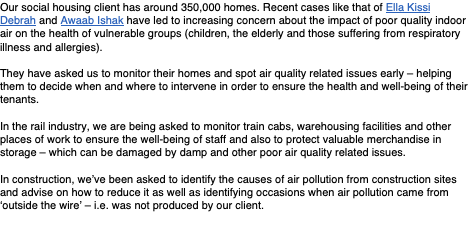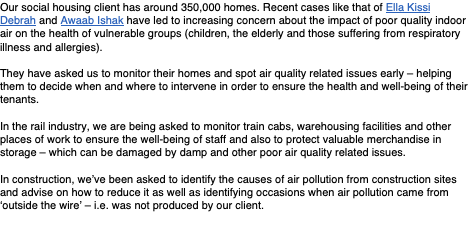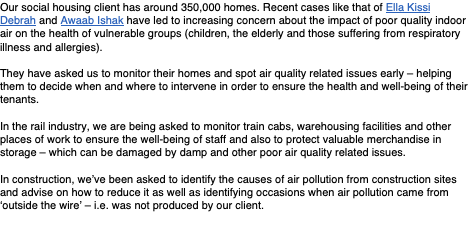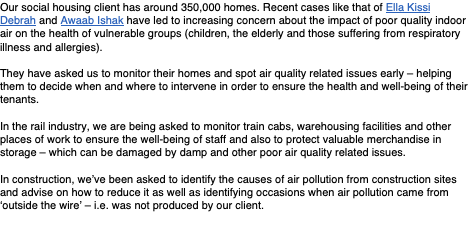


Project Title

Data visualisation and development of customer portal.

Project Summary 

OneSky is looking to develop the existing data collection, visualisation and presentation (reporting) process to offer our clients a more efficient and professional customer dashboard via our website.

The data displayed needs to work at scale, be customisable (for each customer) and be interactive with the ability to:

•	drill up/down within the data
•	look for trends and compare data sets from previous periods
•	visually track where the device has been and when 
 

In addition to the above we are looking to introduce alerts via email or text when a client-defined threshold has been breached.

Finally, we would like to explore the possible role of AI/machine learning in our business – helping to use our data to answer more human/real-world questions such as:

•	is this property safe to live in?
•	who was at fault/what caused a breach?
•	has this happened before?
•	when will this happen again if we don’t intervene?
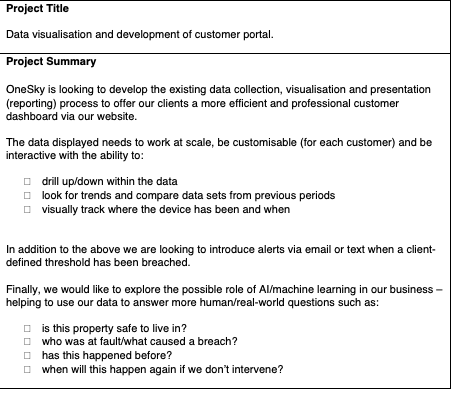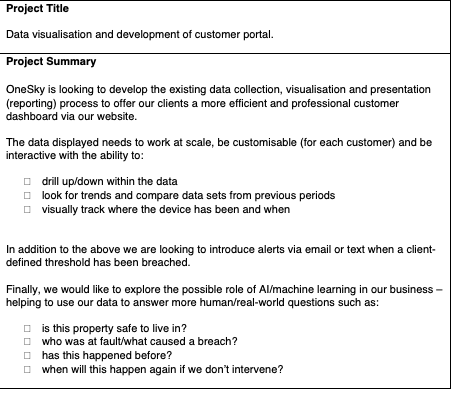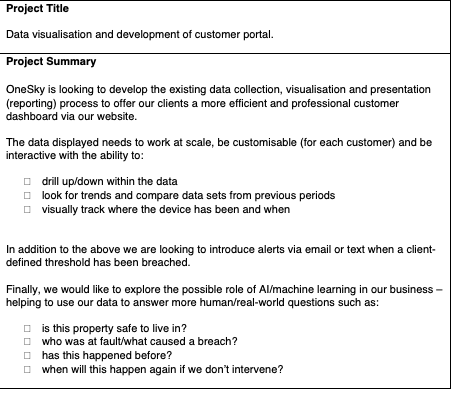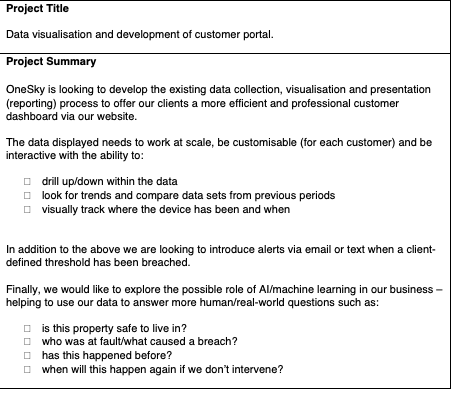

# TODO
1. convert coordinates letter to - or + 
2. convert reading time to hourly mean
3. data normalisation
4. make sequences
5. lstm 3 layers
6. rmse, mae
https://observablehq.com/@d3/gallery?utm_source=d3js-org&utm_medium=hero&utm_campaign=try-observable |